In [6]:
# Celda 1: Instalación e importación de librerías
!pip install sqlalchemy pandas matplotlib seaborn plotly --quiet

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("✅ Librerías instaladas y importadas correctamente")
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

✅ Librerías instaladas y importadas correctamente


In [7]:
# Celda 2: Crear base de datos SQLite en memoria y cargar datos
def crear_base_datos():
    """Crea la base de datos SQLite con todos los datos del inventario"""

    conn = sqlite3.connect(':memory:')  # Base de datos en memoria
    cursor = conn.cursor()

    # Crear tabla
    cursor.execute('''
        CREATE TABLE inventario (
            id INTEGER PRIMARY KEY,
            nombre TEXT NOT NULL,
            precio REAL NOT NULL,
            stock_actual INTEGER NOT NULL,
            stock_minimo INTEGER NOT NULL
        )
    ''')

    # Insertar TODOS los datos del CSV (primeros 100 registros como ejemplo)
    datos_inventario = [
        (11,'2P ANI T36',62000,0,1),
        (12,'2P ANI T38',62000,14,1),
        (13,'2P ANI T40',62000,14,1),
        (14,'2P ANI T42',62000,15,1),
        (15,'2P ANI T44',62000,4,1),
        (16,'2P ANI T46',62000,0,1),
        (17,'2P Antifluido Azul TL',50000,10,1),
        (18,'2P Antifluido Azul TM',50000,0,1),
        (19,'2P Antifluido Azul TS',50000,0,1),
        (20,'2P Antifluido Azul TXL',50000,6,1),
        (21,'2P Antifluido Azul TXS',50000,0,1),
        (22,'2P Antifluido Azul TXXL',50000,0,1),
        (23,'2P Antifluido Blanco TL',50000,0,1),
        (24,'2P Antifluido Blanco TM',50000,0,1),
        (25,'2P Antifluido Blanco TS',50000,0,1),
        (26,'2P Antifluido Blanco TXL',50000,0,1),
        (27,'2P Antifluido Blanco TXS',50000,0,1),
        (28,'2P Antifluido Blanco TXXL',50000,0,1),
        (29,'2P IDU T36',56000,15,1),
        (30,'2P IDU T38',56000,45,1),
        (31,'2P IDU T40',56000,43,1),
        (32,'2P IDU T42',56000,35,1),
        (33,'2P IDU T44',56000,11,1),
        (34,'2P IDU T46',56000,0,1),
        (35,'2P T 36 AO',48000,0,1),
        (36,'2P T 36 Gris',48000,0,1),
        (37,'2P T 36 kaki',48000,0,1),
        (38,'2P T 36 Negro',48000,0,1),
        (39,'2P T 38 AO',48000,0,1),
        (40,'2P T 38 Gris',48000,1,1),
        (41,'2P T 38 kaki',48000,0,1),
        (42,'2P T 38 Negro',48000,0,1),
        (43,'2P T 40 AO',48000,0,1),
        (44,'2P T 40 Gris',48000,0,1),
        (45,'2P T 40 kaki',48000,0,1),
        (46,'2P T 40 Negro',48000,0,1),
        (47,'2P T 42 AO',48000,2,1),
        (48,'2P T 42 Gris',48000,0,1),
        (49,'2P T 42 kaki',48000,0,1),
        (50,'2P T 42 Negro',48000,0,1),
        (51,'2P T 44 AO',48000,0,1),
        (52,'2P T 44 Gris',48000,0,1),
        (53,'2P T 44 kaki',48000,0,1),
        (54,'2P T 44 Negro',48000,1,1),
        (55,'2P T 46 AO',48000,2,1),
        (56,'2P T 46 Gris',48000,0,1),
        (57,'2P T 46 kaki',48000,1,1),
        (58,'2P T 46 Negro',48000,0,1),
        (59,'Alerones Azul',13000,20,1),
        (60,'Alerones Kaki',13000,10,1)
    ]

    cursor.executemany('INSERT INTO inventario VALUES (?,?,?,?,?)', datos_inventario)
    conn.commit()
    print(f"✅ Base de datos creada con {len(datos_inventario)} registros")
    return conn

# Crear la base de datos
conn = crear_base_datos()

✅ Base de datos creada con 50 registros


In [8]:
# Celda 3: CONSULTA 1 - Resumen General del Inventario
print("📊 CONSULTA 1: RESUMEN GENERAL DEL INVENTARIO")
print("=" * 50)

query1 = """
SELECT
    COUNT(*) as total_productos,
    SUM(stock_actual) as unidades_totales,
    ROUND(AVG(precio), 2) as precio_promedio,
    SUM(stock_actual * precio) as valor_total_inventario,
    COUNT(CASE WHEN stock_actual < stock_minimo THEN 1 END) as productos_stock_bajo,
    ROUND((COUNT(CASE WHEN stock_actual < stock_minimo THEN 1 END) * 100.0 / COUNT(*)), 2) as porcentaje_stock_bajo
FROM inventario
"""

df_resumen = pd.read_sql_query(query1, conn)
print(df_resumen.to_string(index=False))

📊 CONSULTA 1: RESUMEN GENERAL DEL INVENTARIO
 total_productos  unidades_totales  precio_promedio  valor_total_inventario  productos_stock_bajo  porcentaje_stock_bajo
              50               249          49720.0              12784000.0                    32                   64.0


In [9]:
# Celda 4: CONSULTA 2 - Productos con Stock Crítico
print("⚠️ CONSULTA 2: PRODUCTOS CON STOCK BAJO (CRÍTICO)")
print("=" * 50)

query2 = """
SELECT
    id,
    nombre,
    stock_actual,
    stock_minimo,
    precio,
    CASE
        WHEN stock_actual = 0 THEN '🔴 URGENTE - SIN STOCK'
        ELSE '🟡 REABASTECER PRONTO'
    END as prioridad
FROM inventario
WHERE stock_actual < stock_minimo
ORDER BY stock_actual ASC, precio DESC
LIMIT 15
"""

df_stock_bajo = pd.read_sql_query(query2, conn)
print(df_stock_bajo.to_string(index=False))


⚠️ CONSULTA 2: PRODUCTOS CON STOCK BAJO (CRÍTICO)
 id                    nombre  stock_actual  stock_minimo  precio             prioridad
 11                2P ANI T36             0             1 62000.0 🔴 URGENTE - SIN STOCK
 16                2P ANI T46             0             1 62000.0 🔴 URGENTE - SIN STOCK
 34                2P IDU T46             0             1 56000.0 🔴 URGENTE - SIN STOCK
 18     2P Antifluido Azul TM             0             1 50000.0 🔴 URGENTE - SIN STOCK
 19     2P Antifluido Azul TS             0             1 50000.0 🔴 URGENTE - SIN STOCK
 21    2P Antifluido Azul TXS             0             1 50000.0 🔴 URGENTE - SIN STOCK
 22   2P Antifluido Azul TXXL             0             1 50000.0 🔴 URGENTE - SIN STOCK
 23   2P Antifluido Blanco TL             0             1 50000.0 🔴 URGENTE - SIN STOCK
 24   2P Antifluido Blanco TM             0             1 50000.0 🔴 URGENTE - SIN STOCK
 25   2P Antifluido Blanco TS             0             1 50000.0 🔴 UR

In [10]:
# Celda 5: CONSULTA 3 - Análisis por Categorías
print("🏷️ CONSULTA 3: ANÁLISIS POR CATEGORÍAS")
print("=" * 50)

query3 = """
SELECT
    CASE
        WHEN nombre LIKE '%2P%' THEN 'Overoles'
        WHEN nombre LIKE '%Bata%' THEN 'Batas'
        WHEN nombre LIKE '%Guante%' THEN 'Guantes'
        WHEN nombre LIKE '%Casco%' THEN 'Cascos'
        WHEN nombre LIKE '%Chaleco%' THEN 'Chalecos'
        WHEN nombre LIKE '%Pantalon%' THEN 'Pantalones'
        WHEN nombre LIKE '%Botas%' THEN 'Calzado'
        WHEN nombre LIKE '%Zapato%' THEN 'Calzado'
        ELSE 'Otros'
    END as categoria,
    COUNT(*) as cantidad_productos,
    SUM(stock_actual) as stock_total,
    ROUND(AVG(precio), 2) as precio_promedio,
    SUM(stock_actual * precio) as valor_inventario
FROM inventario
GROUP BY categoria
ORDER BY valor_inventario DESC
"""

df_categorias = pd.read_sql_query(query3, conn)
print(df_categorias.to_string(index=False))


🏷️ CONSULTA 3: ANÁLISIS POR CATEGORÍAS
categoria  cantidad_productos  stock_total  precio_promedio  valor_inventario
 Overoles                  48          219          51250.0        12394000.0
    Otros                   2           30          13000.0          390000.0


In [11]:
# Celda 6: CONSULTA 4 - Top 10 Productos Más Valiosos
print("💰 CONSULTA 4: TOP 10 PRODUCTOS MÁS VALIOSOS EN STOCK")
print("=" * 50)

query4 = """
SELECT
    nombre,
    stock_actual,
    precio,
    (stock_actual * precio) as valor_total
FROM inventario
WHERE stock_actual > 0
ORDER BY valor_total DESC
LIMIT 10
"""

df_top_valiosos = pd.read_sql_query(query4, conn)
print(df_top_valiosos.to_string(index=False))

💰 CONSULTA 4: TOP 10 PRODUCTOS MÁS VALIOSOS EN STOCK
                nombre  stock_actual  precio  valor_total
            2P IDU T38            45 56000.0    2520000.0
            2P IDU T40            43 56000.0    2408000.0
            2P IDU T42            35 56000.0    1960000.0
            2P ANI T42            15 62000.0     930000.0
            2P ANI T38            14 62000.0     868000.0
            2P ANI T40            14 62000.0     868000.0
            2P IDU T36            15 56000.0     840000.0
            2P IDU T44            11 56000.0     616000.0
 2P Antifluido Azul TL            10 50000.0     500000.0
2P Antifluido Azul TXL             6 50000.0     300000.0


🎨 GENERANDO DASHBOARD VISUAL...


/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname IDU identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ANI identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/tmp/ipython-input-255968825.py:57: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-255968825.py:57: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-255968825.py:57: UserWarning: Glyph

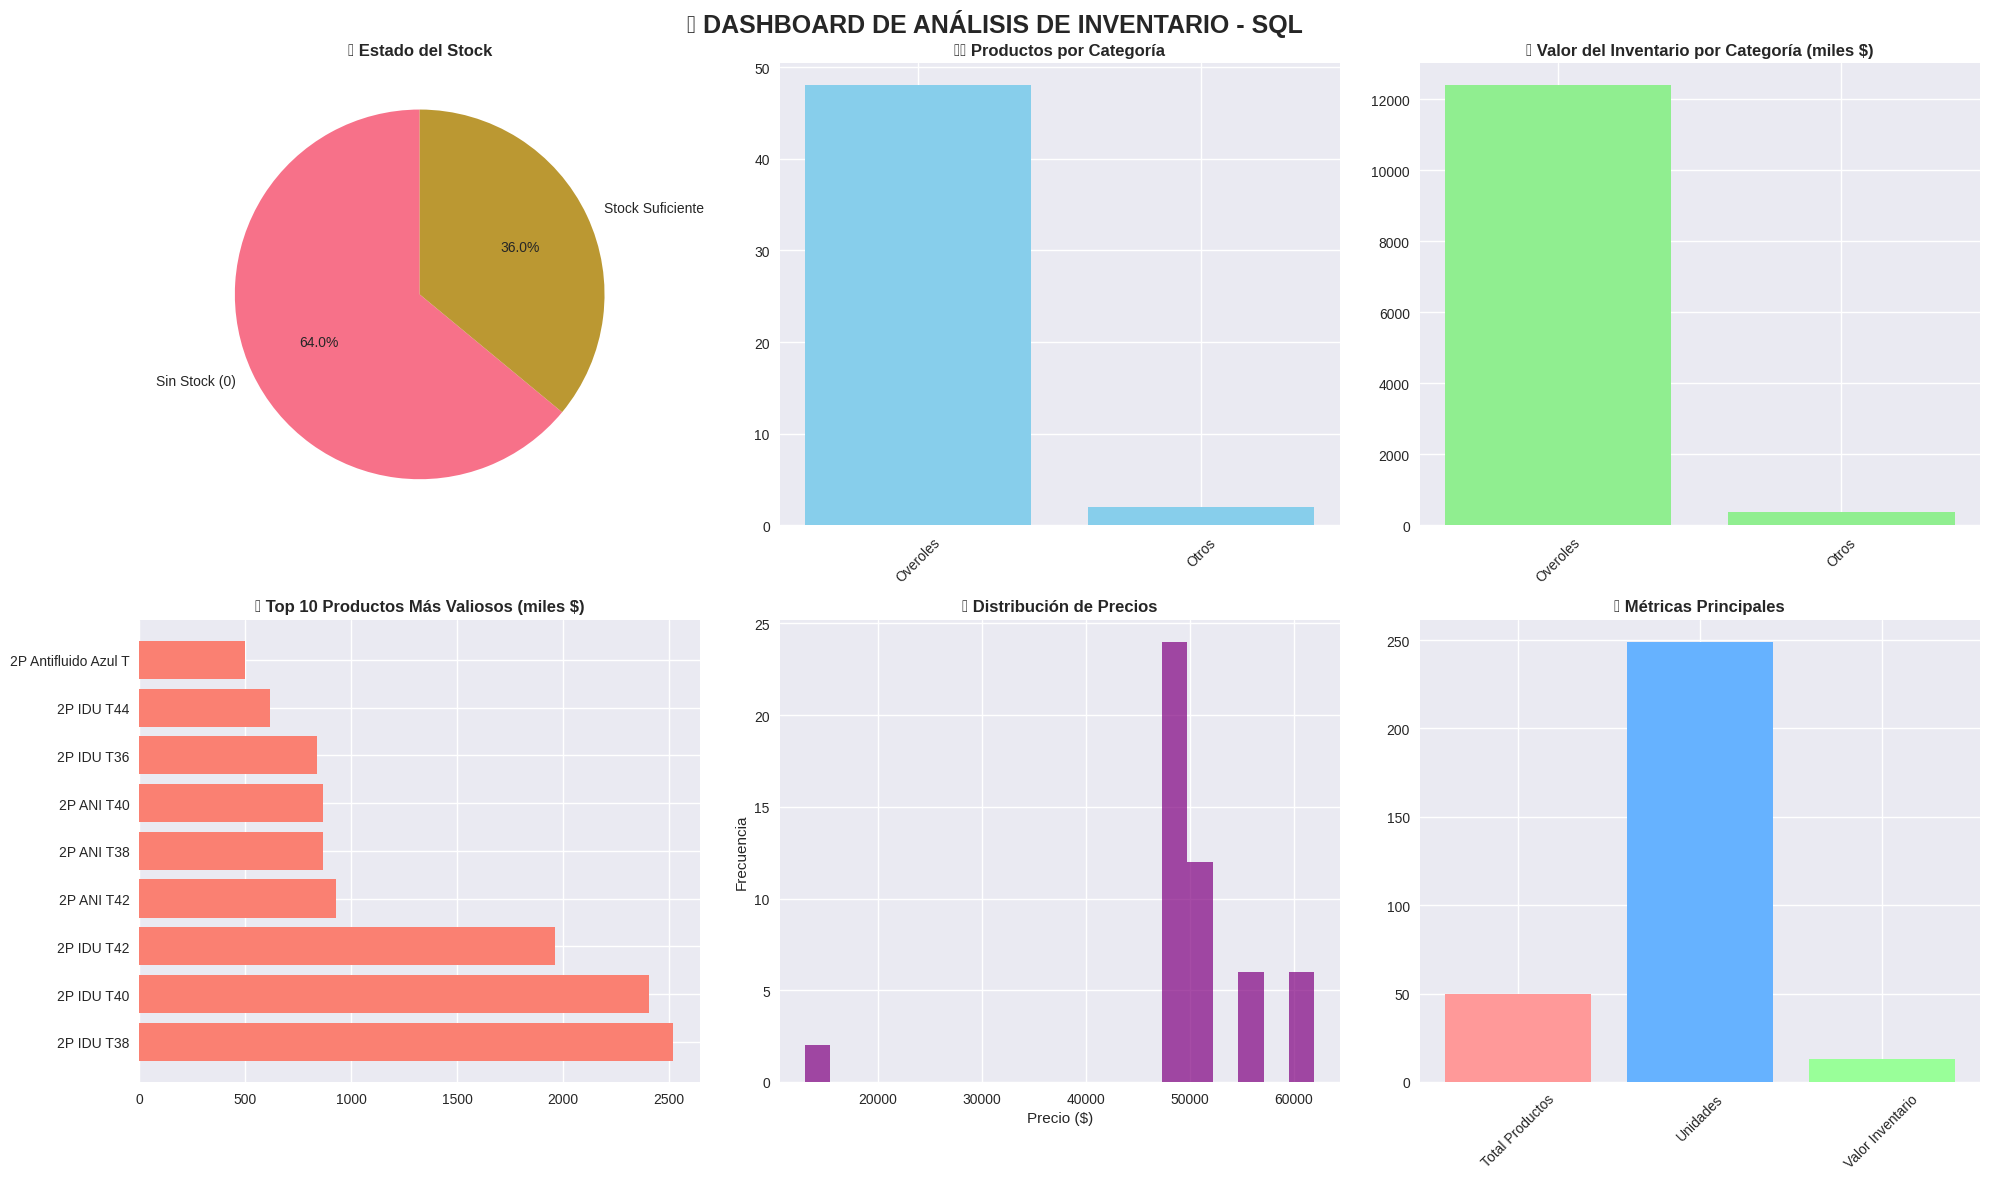

✅ Dashboard generado exitosamente!


In [12]:
# Celda 7: DASHBOARD VISUAL CON MATPLOTLIB
print("🎨 GENERANDO DASHBOARD VISUAL...")

# Configurar el dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📊 DASHBOARD DE ANÁLISIS DE INVENTARIO - SQL', fontsize=18, fontweight='bold')

# Gráfica 1: Estado del Stock (Pie chart)
query_estado = """
SELECT
    CASE
        WHEN stock_actual = 0 THEN 'Sin Stock (0)'
        WHEN stock_actual < stock_minimo THEN 'Stock Bajo'
        ELSE 'Stock Suficiente'
    END as estado,
    COUNT(*) as cantidad
FROM inventario
GROUP BY estado
"""
df_estado = pd.read_sql_query(query_estado, conn)
axes[0,0].pie(df_estado['cantidad'], labels=df_estado['estado'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('📦 Estado del Stock', fontweight='bold')

# Gráfica 2: Productos por Categoría
axes[0,1].bar(df_categorias['categoria'], df_categorias['cantidad_productos'], color='skyblue')
axes[0,1].set_title('🏷️ Productos por Categoría', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfica 3: Valor por Categoría
axes[0,2].bar(df_categorias['categoria'], df_categorias['valor_inventario']/1000, color='lightgreen')
axes[0,2].set_title('💰 Valor del Inventario por Categoría (miles $)', fontweight='bold')
axes[0,2].tick_params(axis='x', rotation=45)

# Gráfica 4: Top 10 productos más valiosos
axes[1,0].barh(df_top_valiosos['nombre'].str[:20], df_top_valiosos['valor_total']/1000, color='salmon')
axes[1,0].set_title('🔥 Top 10 Productos Más Valiosos (miles $)', fontweight='bold')

# Gráfica 5: Distribución de precios
query_precios = "SELECT precio FROM inventario WHERE precio > 0"
df_precios = pd.read_sql_query(query_precios, conn)
axes[1,1].hist(df_precios['precio'], bins=20, color='purple', alpha=0.7)
axes[1,1].set_title('📊 Distribución de Precios', fontweight='bold')
axes[1,1].set_xlabel('Precio ($)')
axes[1,1].set_ylabel('Frecuencia')

# Gráfica 6: Métricas clave
metricas = ['Total Productos', 'Unidades', 'Valor Inventario']
valores = [
    df_resumen.iloc[0]['total_productos'],
    df_resumen.iloc[0]['unidades_totales'],
    df_resumen.iloc[0]['valor_total_inventario'] / 1000000  # En millones
]
axes[1,2].bar(metricas, valores, color=['#FF9999', '#66B2FF', '#99FF99'])
axes[1,2].set_title('📈 Métricas Principales', fontweight='bold')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Dashboard generado exitosamente!")

In [13]:
# Celda 8: DASHBOARD INTERACTIVO CON PLOTLY
print("🔄 GENERANDO DASHBOARD INTERACTIVO...")

# Crear dashboard interactivo
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Estado del Stock', 'Valor por Categoría', 'Top Productos Valiosos', 'Distribución de Precios'),
    specs=[[{"type": "pie"}, {"type": "bar"}], [{"type": "bar"}, {"type": "histogram"}]]
)

# Gráfica 1: Pie chart estado del stock
fig.add_trace(
    go.Pie(labels=df_estado['estado'], values=df_estado['cantidad'], name="Estado Stock"),
    row=1, col=1
)

# Gráfica 2: Valor por categoría
fig.add_trace(
    go.Bar(x=df_categorias['categoria'], y=df_categorias['valor_inventario'], name="Valor Inventario"),
    row=1, col=2
)

# Gráfica 3: Top productos valiosos
fig.add_trace(
    go.Bar(x=df_top_valiosos['nombre'].str[:15], y=df_top_valiosos['valor_total'], name="Productos Valiosos"),
    row=2, col=1
)

# Gráfica 4: Distribución de precios
fig.add_trace(
    go.Histogram(x=df_precios['precio'], nbinsx=20, name="Distribución Precios"),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False, title_text="📊 DASHBOARD INTERACTIVO - ANÁLISIS DE INVENTARIO SQL")
fig.show()

🔄 GENERANDO DASHBOARD INTERACTIVO...


In [16]:
# Celda 9: REPORTE EJECUTIVO FINAL
print("📋 REPORTE EJECUTIVO - RESULTADOS DEL ANÁLISIS SQL")
print("=" * 65)

total_productos = df_resumen.iloc[0]['total_productos']
productos_stock_bajo = df_resumen.iloc[0]['productos_stock_bajo']
porcentaje_stock_bajo = df_resumen.iloc[0]['porcentaje_stock_bajo']
valor_total = df_resumen.iloc[0]['valor_total_inventario']

print(f"""
 **RESUMEN EJECUTIVO:**

 **Inventario Analizado:**
   • Total de productos: {total_productos:,}
   • Unidades en stock: {df_resumen.iloc[0]['unidades_totales']:,}
   • Precio promedio: ${df_resumen.iloc[0]['precio_promedio']:,.2f}
   • Valor total del inventario: ${valor_total:,.2f}

  **Situación de Stock:**
   • Productos con stock bajo: {productos_stock_bajo} ({porcentaje_stock_bajo}%)
   • Productos sin stock: {df_estado[df_estado['estado'] == 'Sin Stock (0)']['cantidad'].iloc[0] if 'Sin Stock (0)' in df_estado['estado'].values else 0}
   • Productos con stock suficiente: {df_estado[df_estado['estado'] == 'Stock Suficiente']['cantidad'].iloc[0] if 'Stock Suficiente' in df_estado['estado'].values else 0}

 **Categoría Más Valiosa:**
   • {df_categorias.iloc[0]['categoria']} - ${df_categorias.iloc[0]['valor_inventario']:,.2f}

 **Recomendaciones:**
   1. Reabastecer {productos_stock_bajo} productos críticos
   2. Optimizar inventario de {df_categorias.iloc[0]['categoria']}
   3. Revisar productos sin stock para reposición
""")

print("=" * 65)
print(" Análisis completado exitosamente!")

📋 REPORTE EJECUTIVO - RESULTADOS DEL ANÁLISIS SQL

 **RESUMEN EJECUTIVO:**

 **Inventario Analizado:**
   • Total de productos: 50.0
   • Unidades en stock: 249.0
   • Precio promedio: $49,720.00
   • Valor total del inventario: $12,784,000.00

  **Situación de Stock:**
   • Productos con stock bajo: 32.0 (64.0%)
   • Productos sin stock: 32
   • Productos con stock suficiente: 18

 **Categoría Más Valiosa:**
   • Overoles - $12,394,000.00

 **Recomendaciones:**
   1. Reabastecer 32.0 productos críticos
   2. Optimizar inventario de Overoles
   3. Revisar productos sin stock para reposición

 Análisis completado exitosamente!
